# Repaso (Módulo 2)
# Examen Módulo 2 - Simulación Montecarlo. <font color=blue>Tipo de examen 1</font>.
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ZapataCristian*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.
> El tema principal en este módulo fueron simulaciones Montecarlo. Al finalizar este módulo, se espera que ustedes tengan las siguientes competencias
> - Evaluar integrales (o encontrar áreas) numéricamente mendiante métodos Montecarlo.
> - Poder replicar fractales aleatorios símples (como los de Barnsley), dadas las características del mismo.
> - Realizar evaluaciones de probabilidad precio-umbral.

## TIPO DE EXAMEN ASIGNADO
https://drive.google.com/file/d/19rcQyjtzkfcHItyROkIsgT3OXOh-fIUS/view

## Ejemplo 1.1. Evaluación numérica de integrales utilizando Montecarlo

- En la clase de evaluación de integrales numéricas por montecarlo vimos dos tipos de evaluación de integrales.
- El tipo 1 se basaba en la definición de valor promedio de una función.
- El tipo 2 se basaba en probabilidades y una variable aleatoria de bernoulli (para encontrar áreas).

En clase desarrollamos funciones para la evaluación de integrales con ambos métodos (explicar porqué la segunda se puede ver como una integral). La función para Montecarlo tipo 1 es la siguiente:

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd

In [2]:
# Escribir la función acá
def montecarlo1(f, a, b, N):
    u = (b-a)*np.random.rand(N)+a
    return (b-a)*np.mean(f(u))

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

### Solución

In [3]:
# Funciones
def f1(x):
    return np.sqrt(1+x**4)

def f2(x):
    return np.log(np.log(x))

def f3(x):
    return 1/np.log(x)

def f4(x):
    return np.exp(-x**2/2)

In [4]:
# Parámetros
a, b = 4, 5
N = np.logspace(0, 5, 6)

In [5]:
# DataFrame con resultados
tabla = pd.DataFrame(index = N, columns=['f1', 'f2', 'f3', 'f4'])
for n in N:
    tabla.loc[n,'f1'] = montecarlo1(f1, a, b, n.astype(int))
    tabla.loc[n,'f2'] = montecarlo1(f2, a, b, n.astype(int))
    tabla.loc[n,'f3'] = montecarlo1(f3, a, b, n.astype(int))
    tabla.loc[n,'f4'] = montecarlo1(f4, a, b, n.astype(int))
tabla

,f1,f2,f3,f4
1.0,16.9323,0.460047,0.640757,1.80899e-05
10.0,19.6919,0.412945,0.674118,6.23783e-05
100.0,20.3066,0.404104,0.671028,8.76406e-05
1000.0,20.4123,0.405971,0.666904,8.03169e-05
10000.0,20.3267,0.406025,0.66679,7.89785e-05
100000.0,20.3709,0.405965,0.666968,7.87144e-05


## Ejemplo 1.2.
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [6]:
#importar libreria para graficar
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Graficar la región
#Se definen los límites en x,y en que se encuentra la región graficandolos
N = 100
x = np.linspace(-3,0.5,N)
y = np.linspace(0,3,N)

In [8]:
def region1(x,y):
    return x**2 + 2*y**2 < -2*x + 8*y-7

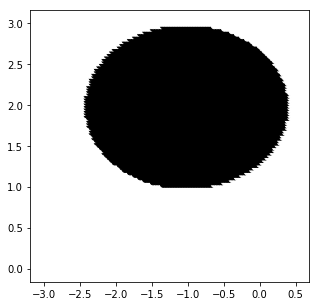

In [9]:
##~
X,Y = np.meshgrid(x,y)
plt.figure(figsize=(5,5))
plt.scatter(X,Y,c = ~region1(X,Y),cmap='bone')
plt.show()

Definimos la función montecarlo2 para resolver el área con el método 2 visto en clase

In [10]:
# Función montecarlo2 que encuentra el área de una región dentro de otra región conocida 
#en base a variables aleatoria de bernoulli
def montecarlo2(region,a1,b1,a2,b2,n):
    #a1, b1, límites en x de la región conocida
    #a2, b2, límites en y de la región conocida
    #region: zona del plano cartesiano a la que se le desea encontrar el área
    #n: número de puntos pseudoaleatorios que se generarán en el plano
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1,b1,n)
    y = np.random.uniform(a2,b2,n)
    return AR*np.mean(region(x,y))

Encontrar el área con el número de términos deseados

In [11]:
# Resolver
N = np.logspace(1,5,5)
a1,b1,a2,b2 = -3,0.5,0,3
tabla4 = pd.DataFrame(index = N,columns=['Aproximación','Error'])
for n in N:
    tabla4.loc[n,'Aproximación'] = montecarlo2(region1,a1,b1,a2,b2,n.astype(int))
#Área real
AD = np.sqrt(2)*np.pi
tabla4['Error'] = np.abs(tabla4['Aproximación']-AD)
tabla4

,Aproximación,Error
10.0,6.3,1.85712
100.0,3.885,0.557883
1000.0,4.179,0.263883
10000.0,4.431,0.0118829
100000.0,4.43184,0.0110429


## Ejemplo 2. Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico (¿Qué es esto?).

Como en la clase de fractales, repliquemos el fractal tipo Barnsley descrito por la siguiente tabla...

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

In [12]:
import pandas as pd
import numpy as np

In [13]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


### Solución

In [14]:
# Importar librerías para graficar y de números aleatorios
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [15]:
# Matriz de Barnsley
Mat_Barnsley = df.iloc[:,:].values
Mat_Barnsley

array([[ 0.5,  0. ,  0. ,  0.5,  1. ,  1. ,  0.1],
       [ 0.5,  0. ,  0. ,  0.5, 50. ,  1. ,  0.2],
       [ 0.5,  0. ,  0. ,  0.5,  1. , 50. ,  0.3],
       [ 0.5,  0. ,  0. ,  0.5, 50. , 50. ,  0.4]])

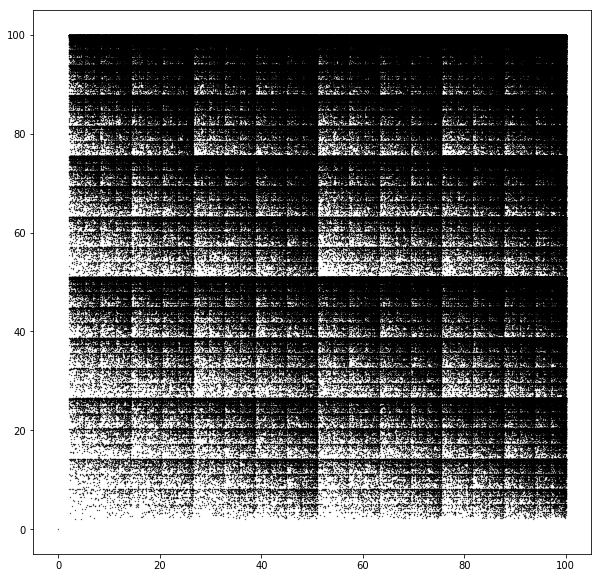

In [16]:
# Iteraciones para generar el fractal
# Punto inicial
x, y = [0], [0]
# Valores de i con su probabilidad
seq = np.array([0,1,2,3])
prob = Mat_Barnsley[:,-1]
a = Mat_Barnsley[:,0]
b = Mat_Barnsley[:,1]
c = Mat_Barnsley[:,2]
d = Mat_Barnsley[:,3]
e = Mat_Barnsley[:,4]
f = Mat_Barnsley[:,5]
# Generación de puntos con las frecuencias dadas
for k in range(1000000):
    i = random.choices(seq, weights=prob)[0]
    x.append(a[i]*x[-1]+b[i]*y[-1]+e[i])
    y.append(c[i]*x[-2]+d[i]*y[-1]+f[i])
# Graficamos
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c='k', s=0.1)
plt.show()

## Ejemplo 3. Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2018 para ver si el análisis concuerda.

Descarguemos datos para Apple y Microsoft en el 2017

In [17]:
# Importamos librerías
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(names, start_date, end_date):
    closes = web.DataReader(name=names,
                           data_source="yahoo",
                           start=start_date,
                           end=end_date)
    return closes['Adj Close']

In [19]:
# Precios
names = ['AAPL','MSFT']
start, end = '2010-01-01', '2017-12-31'
closes = get_closes(names=names, start_date=start, end_date=end)

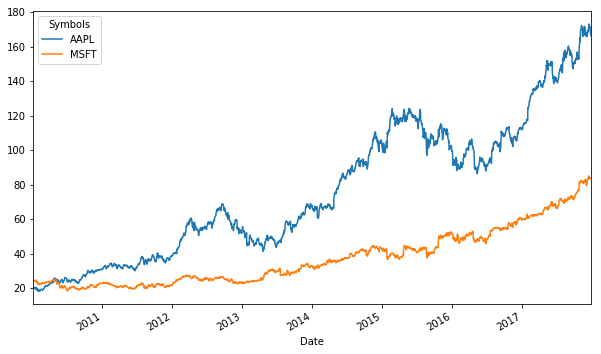

In [20]:
# Gráfico
closes.plot(figsize=(10,6));

Calculamos los rendimientos diarios junto con sus características estadísticas

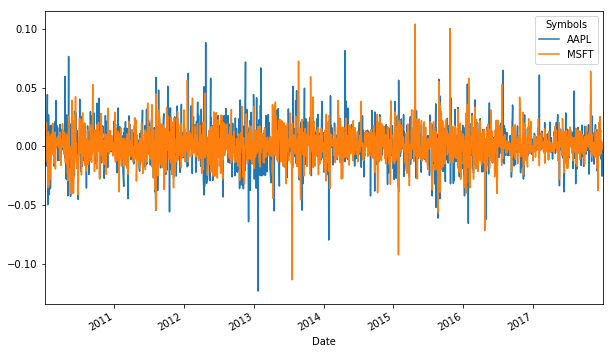

In [21]:
# Rendimientos porcentuales diarios
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [22]:
# Media y desviación estándar de cada activo
mu_AAPL, mu_MSFT = ret.mean()["AAPL"], ret.mean()["MSFT"]
mu_AAPL, mu_MSFT

(0.0011720726726601194, 0.000707038366168024)

In [23]:
s_AAPL, s_MSFT = ret.std()["AAPL"], ret.std()["MSFT"]
s_AAPL, s_MSFT

(0.016074329476354173, 0.014037362778184546)

Simulamos 1000 escenarios de rendimientos diarios para el 2017 (para cada una de las empresas)

In [24]:
# Función que simula varios escenarios de rendimientos diarios
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [25]:
# Simulación de rendimientos para cada empresa
simret_AAPL = ret_sim(mu_AAPL, s_AAPL, 365, 1000, '2018-01-01')
simret_MSTF = ret_sim(mu_MSFT, s_MSFT, 365, 1000, '2018-01-01')
#simret_MSTF

Calculamos los precios con base en los rendimientos simulados

In [26]:
# Obtenemos los precios
simcloses_AAPL = closes.iloc[-1].AAPL*((1+simret_AAPL).cumprod())
simcloses_MSFT = closes.iloc[-1].MSFT*((1+simret_MSTF).cumprod())

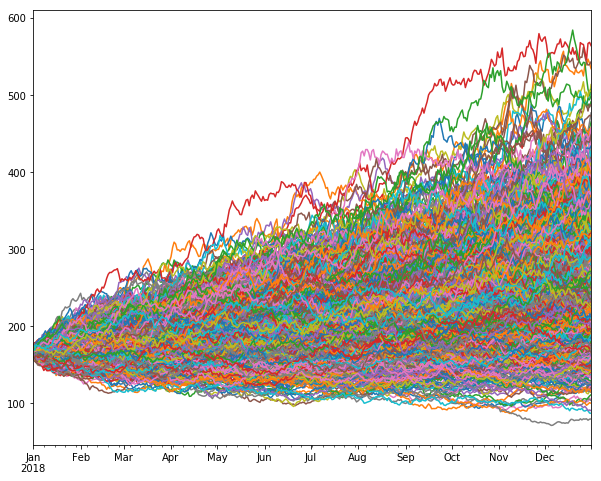

In [27]:
simcloses_AAPL.plot(figsize=(10,8),legend=False);

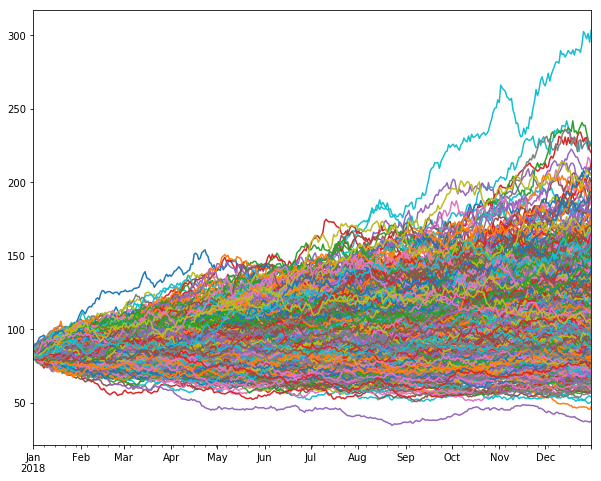

In [28]:
simcloses_MSFT.plot(figsize=(10,8),legend=False);

Calculamos las probabilidades con base en una tasa de interés anual deseada

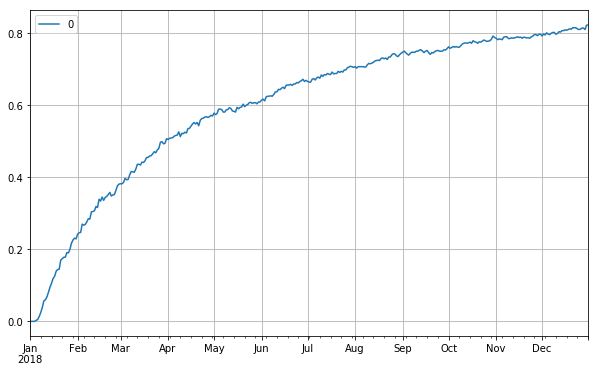

In [29]:
# Probabilidad de que el precio incremente un 10% en el siguiente año
K_AAPL = (1+0.10)*closes.iloc[-1].AAPL
prob = pd.DataFrame((simcloses_AAPL>K_AAPL).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

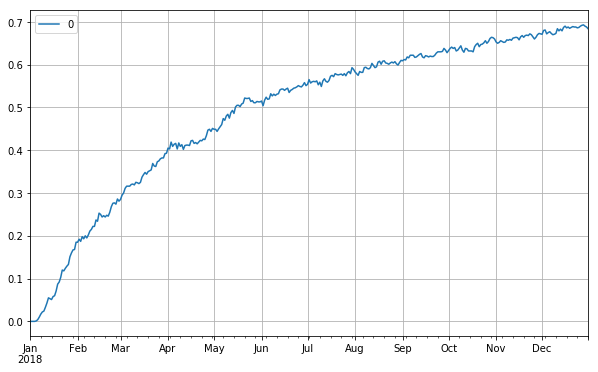

In [30]:
# Probabilidad de que el precio incremente un 10% en el siguiente año
K_MSFT = (1+0.10)*closes.iloc[-1].MSFT
prob = pd.DataFrame((simcloses_MSFT>K_MSFT).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

Finalmente, veamos los datos reales del 2018 para ver que tan acertados fueron nuestros análisis...

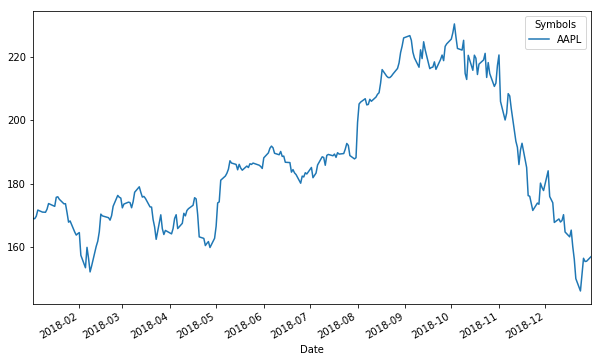

In [31]:
start, end = '2018-01-01', '2018-12-31'
name = ['AAPL']
closes2018 = get_closes(names=name, start_date=start, end_date=end)
closes2018.plot(figsize=(10,6));

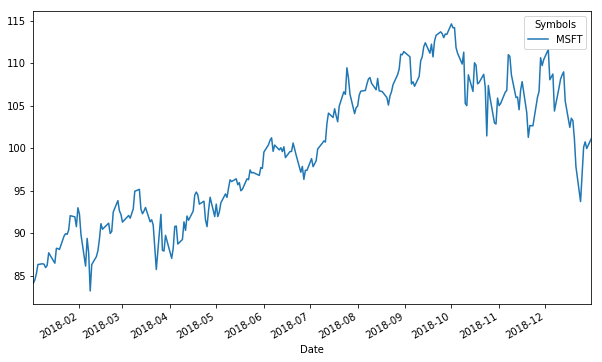

In [32]:
start, end = '2018-01-01', '2018-12-31'
name = ['MSFT']
closes2018 = get_closes(names=name, start_date=start, end_date=end)
closes2018.plot(figsize=(10,6));

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>